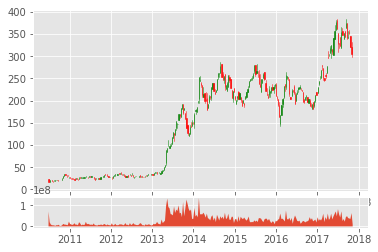

In [17]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas_datareader.data as web 

style.use('ggplot')
df=pd.read_csv('tsla',parse_dates= True, index_col=0)
#incase stock has stock splits TSLA never had stock split so can be skipped in this case 
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()